In [20]:
# !mkdir ToGIF
# !mkdir GIF

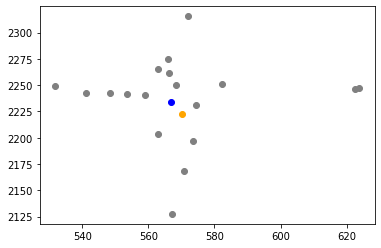

In [85]:
# import csv
# from tqdm.notebook import tqdm

# index = 0

# root_dir = "data/argoverse_raw/train/"
# file_list = os.listdir(root_dir)
# num_figname = 1

# color = {"AGENT" : "blue", "AV" : "orange", "OTHERS" : "gray"}

# trajectory = {}
# trajectory["AV"] = np.empty((0,2))
# trajectory["AGENT"] = np.empty((0,2))
# trajectory["OTHERS"] = np.empty((0,2))

# with open(root_dir + file_list[index], newline='') as csvfile:
#     spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
#     time_step = -1
#     for i, row in tqdm(enumerate(spamreader)):
#         if i >0:
#             if time_step != row[0]:
#                 time_step = row[0]
#                 try:
#                     plt.plot(trajectory["AV"][...,0],trajectory["AV"][...,1],color=color["AV"], zorder=1)
#                     plt.plot(trajectory["AV"][...,0],trajectory["AV"][...,1],color=color["AGENT"],zorder=1)
# #                     print("AGENT: ", trajectory["AGENT"])
# #                     print("AV: ", trajectory["AV"])
#                 except:
# #                     print("pass")
# #                     print(trajectory["AGENT"])

#                     pass
# #                 plt.legend()
#                 plt.savefig("ToGIF/" + str(num_figname).zfill(3) + ".png")
#                 num_figname +=1
#                 plt.cla()
            
#             plt.scatter(float(row[3]), float(row[4]), color = color[row[2]], label = row[2])
#             trajectory[row[2]] = np.append(trajectory[row[2]],np.array([[float(row[3]), float(row[4])]]), axis=0)
# #             if num_figname == 20:

# #                 break

In [11]:
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import imageio
from PIL import Image
import matplotlib.image as mpimg

index = 0

root_dir = "data/argoverse_raw/test/"
file_list = sorted(os.listdir(root_dir), key = lambda a: int(a.split('.')[0]))

color = {"AGENT" : "blue", "AV" : "orange", "OTHERS" : "gray"}


from argoverse.map_representation.map_api import ArgoverseMap

am = ArgoverseMap()

csv = pd.read_csv(root_dir + file_list[index])
xmax,xmin = max(csv["X"]), min(csv["X"])
ymax,ymin = max(csv["Y"]), min(csv["Y"])
local_lane_polygons = am.find_local_lane_polygons([xmin, xmax, ymin, ymax], csv["CITY_NAME"][0])

In [12]:
ans = 0
for i in csv['OBJECT_TYPE']:
    if i == "AV":
        ans +=1
        
print(ans)

20


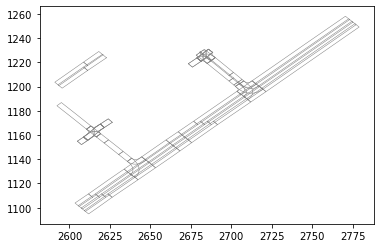

In [4]:
for l in local_lane_polygons:
    x_l = l[...,0]
    y_l = l[...,1]
    plt.plot(x_l,y_l,linewidth=0.5, color = 'gray')

In [6]:
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import imageio
from PIL import Image
import matplotlib.image as mpimg

index = 0

root_dir = "argoverse_raw/train/"
file_list = sorted(os.listdir(root_dir), key = lambda a: int(a.split('.')[0]))

color = {"AGENT" : "blue", "AV" : "orange", "OTHERS" : "gray"}


from argoverse.map_representation.map_api import ArgoverseMap

am = ArgoverseMap()







for index in range(50):
#     print(index)
    trajectory = {}
    trajectory["AV"] = np.empty((0,2))
    trajectory["AGENT"] = np.empty((0,2))
    trajectory["OTHERS"] = np.empty((0,2))
    num_figname = 1

    csv = pd.read_csv(root_dir + file_list[index])

    xmax,xmin = max(csv["X"]), min(csv["X"])
    ymax,ymin = max(csv["Y"]), min(csv["Y"])
    local_lane_polygons = am.find_local_lane_polygons([xmin, xmax, ymin, ymax], csv["CITY_NAME"][0])
    print(len(local_lane_polygons))
    plt.xlim(xmin-20, xmax + 20)
    plt.ylim(ymin-20, ymax + 20)

    time_step = csv["TIMESTAMP"][0]
    X = csv["OBJECT_TYPE"]
    Y = csv["Y"]

    length = len(csv["TIMESTAMP"])

    for i in tqdm(range(length)):
        x,y,OT = csv["X"][i], csv["Y"][i], csv["OBJECT_TYPE"][i]
        if time_step != csv["TIMESTAMP"][i]:
            for l in local_lane_polygons:
                x_l = l[...,0]
                y_l = l[...,1]
                plt.plot(x_l,y_l,linewidth=0.5, color = 'gray')
            try:
                for j in ["AV", "AGENT"]:
                    plt.plot(trajectory[j][...,0],trajectory[j][...,1],color=color[j], zorder=1)
                    plt.scatter(trajectory[j][...,0][-1], trajectory[j][...,1][-1],color=color[j], zorder=1, label = j)

                plt.scatter(trajectory["OTHERS"][...,0], trajectory["OTHERS"][...,1], color = color["OTHERS"], label = "OTHERS")
                trajectory["OTHERS"] = np.empty((0,2))

            except:
                pass
                print("pass")
                break
            plt.legend()
            plt.title("time_step: %.4f"%time_step )

            plt.savefig("ToGIF/" + str(num_figname).zfill(3) + ".png")
            num_figname +=1
            plt.cla()
            plt.xlim(xmin-20, xmax + 20)
            plt.ylim(ymin-20, ymax + 20)
            time_step = csv["TIMESTAMP"][i]

        elif i == length - 1:
            plt.scatter(x, y, color = color[OT], label = OT)
            trajectory[OT] = np.append(trajectory[OT],np.array([[x, y]]), axis=0)
            for l in local_lane_polygons:
                x_l = l[...,0]
                y_l = l[...,1]
                plt.plot(x_l,y_l,linewidth=0.5, color = 'gray')
            try:
                for j in ["AV", "AGENT"]:
                    plt.plot(trajectory[j][...,0],trajectory[j][...,1],color=color[j], zorder=1, )
                    plt.scatter(trajectory[j][...,0][-1], trajectory[j][...,1][-1],color=color[j], zorder=1, label = j)

                plt.scatter(trajectory["OTHERS"][...,0], trajectory["OTHERS"][...,1], color = color["OTHERS"], label = "OTHERS")
                trajectory["OTHERS"] = np.empty((0,2))
                trajectory["AV"] = np.empty((0,2))
                trajectory["AGENT"] = np.empty((0,2))
            except:
                pass
                print("pass")
                break
            plt.legend()
            plt.title("time_step: %.4f"%time_step )
            plt.savefig("ToGIF/" + str(num_figname).zfill(3) + ".png")
            plt.close()
            break
        trajectory[OT] = np.append(trajectory[OT],np.array([[x, y]]), axis=0)



    path = [f"./ToGIF/{j}" for j in sorted(os.listdir("./ToGIF"), key= lambda a: int(a.split('.')[0]))]
    paths = [Image.open(j) for j in path]
    imageio.mimsave('./GIF/' + str(index) + '_lane.gif', paths, fps=22)
    print('./GIF/' + str(index) + '_lane.gif is saved')
    !rm ToGIF/*


79



./GIF/0_lane.gif is saved
60



./GIF/1_lane.gif is saved
35



./GIF/2_lane.gif is saved
107



./GIF/3_lane.gif is saved
94



./GIF/4_lane.gif is saved
46



./GIF/5_lane.gif is saved
109



./GIF/6_lane.gif is saved
63



./GIF/7_lane.gif is saved
118



./GIF/8_lane.gif is saved
139



./GIF/9_lane.gif is saved
88



./GIF/10_lane.gif is saved
111



./GIF/11_lane.gif is saved
110



./GIF/12_lane.gif is saved
72



./GIF/13_lane.gif is saved
135



./GIF/14_lane.gif is saved
65



./GIF/15_lane.gif is saved
147



./GIF/16_lane.gif is saved
129



./GIF/17_lane.gif is saved
83



./GIF/18_lane.gif is saved
78



./GIF/19_lane.gif is saved
73



./GIF/20_lane.gif is saved
198



./GIF/21_lane.gif is saved
93



./GIF/22_lane.gif is saved
77



./GIF/23_lane.gif is saved
141



./GIF/24_lane.gif is saved
110



./GIF/25_lane.gif is saved
45



./GIF/26_lane.gif is saved
58



./GIF/27_lane.gif is saved
82



./GIF/28_lane.gif is saved
27



./GIF/29_lane.gif is saved
102



./GIF/30_lane.gif is saved
77



./GIF/31_lane.gif is saved
41



./GIF/32_lane.gif is saved
56



./GIF/33_lane.gif is saved
101



./GIF/34_lane.gif is saved
125



./GIF/35_lane.gif is saved
73



./GIF/36_lane.gif is saved
38



./GIF/37_lane.gif is saved
212



./GIF/38_lane.gif is saved
63



./GIF/39_lane.gif is saved
33



./GIF/40_lane.gif is saved
74



./GIF/41_lane.gif is saved
39



./GIF/42_lane.gif is saved
55



./GIF/43_lane.gif is saved
100



./GIF/44_lane.gif is saved
82



./GIF/45_lane.gif is saved
90



./GIF/46_lane.gif is saved
72



./GIF/47_lane.gif is saved
195



./GIF/48_lane.gif is saved
126



./GIF/49_lane.gif is saved


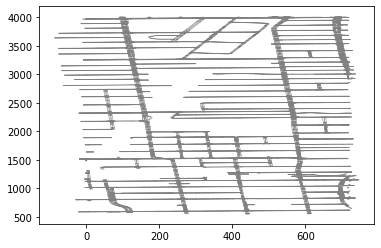

In [17]:
local_lane_polygons = am.find_local_lane_polygons([xmin, xmax, ymin, ymax], csv["CITY_NAME"][0])
for l in local_lane_polygons:
    x_l = l[...,0]
    y_l = l[...,1]
    plt.plot(x_l,y_l,linewidth=0.5, color = 'gray')
plt.show()

In [16]:
[xmin, xmax, ymin, ymax]

[640.5452197174783, 715.5208021523538, 3802.248276968051, 4003.0806010870797]

In [14]:
local_lane_polygons

array([], dtype=object)

In [3]:
tracking_dataset_dir = '../argoverse-api/argoverse-tracking/sample/'

from argoverse.map_representation.map_api import ArgoverseMap

am = ArgoverseMap()


In [4]:
from argoverse.data_loading.argoverse_tracking_loader import ArgoverseTrackingLoader

log_index = 0
frame_index = 20
idx = 1
argoverse_loader = ArgoverseTrackingLoader(tracking_dataset_dir)
log_id = argoverse_loader.log_list[log_index]
argoverse_data = argoverse_loader[log_index]
city_name = argoverse_data.city_name

lidar_pts = argoverse_data.get_lidar(idx)


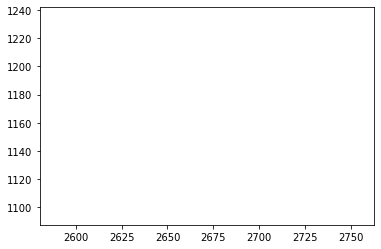

In [10]:
import os
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import imageio
from PIL import Image
import matplotlib.image as mpimg

index = 0

root_dir = "data/argoverse_raw/train/"
file_list = sorted(os.listdir(root_dir), key = lambda a: int(a.split('.')[0]))

color = {"AGENT" : "blue", "AV" : "orange", "OTHERS" : "gray"}


trajectory = {}
trajectory["AV"] = np.empty((0,2))
trajectory["AGENT"] = np.empty((0,2))
trajectory["OTHERS"] = np.empty((0,2))
num_figname = 1

csv = pd.read_csv(root_dir + file_list[index])

xmax,xmin = max(csv["X"]), min(csv["X"])
ymax,ymin = max(csv["Y"]), min(csv["Y"])

plt.xlim(xmin-20, xmax + 20)
plt.ylim(ymin-20, ymax + 20)

time_step = csv["TIMESTAMP"][0]
X = csv["OBJECT_TYPE"]
Y = csv["Y"]

length = len(csv["TIMESTAMP"])

In [11]:
local_lane_polygons = am.find_local_lane_polygons([xmin, xmax, ymin, ymax], csv["CITY_NAME"][0])


In [18]:
import torch


In [94]:
adjacency = torch.rand(10,10)
num_agent_mask1 = torch.Tensor([[1,1,0.3,1,1]])
num_agent_mask2 = torch.Tensor([[1,1,0.8,1,1]])

In [117]:
num_agent_mask = []
for i in range(11):
    num_agent_mask.append(torch.rand(1,11))


In [118]:
num = 0
for i in num_agent_mask:
    print("num_agent_mask " + str(num) + ": ", i)
    num+=1
    

num_agent_mask 0:  tensor([[0.1013, 0.4769, 0.3640, 0.6623, 0.8702, 0.9721, 0.5173, 0.7390, 0.5709,
         0.3192, 0.5662]])
num_agent_mask 1:  tensor([[0.8349, 0.8712, 0.5421, 0.3144, 0.8351, 0.7285, 0.3044, 0.4971, 0.0654,
         0.0495, 0.3548]])
num_agent_mask 2:  tensor([[0.0880, 0.4524, 0.1552, 0.3093, 0.3516, 0.5038, 0.3321, 0.5478, 0.8967,
         0.4128, 0.8510]])
num_agent_mask 3:  tensor([[0.9656, 0.2808, 0.6689, 0.0536, 0.1490, 0.8947, 0.6106, 0.1925, 0.2094,
         0.7012, 0.7778]])
num_agent_mask 4:  tensor([[0.8585, 0.4115, 0.5463, 0.9295, 0.5451, 0.0750, 0.4689, 0.0067, 0.6010,
         0.0909, 0.8923]])
num_agent_mask 5:  tensor([[0.5660, 0.2109, 0.7820, 0.1541, 0.0398, 0.9452, 0.9394, 0.2608, 0.6562,
         0.9395, 0.4706]])
num_agent_mask 6:  tensor([[0.4320, 0.5874, 0.2214, 0.4471, 0.2218, 0.9894, 0.4767, 0.5168, 0.3923,
         0.7884, 0.1844]])
num_agent_mask 7:  tensor([[0.3965, 0.7434, 0.9210, 0.7469, 0.5152, 0.3394, 0.6785, 0.5253, 0.6807,
         0.

adjacency

In [120]:
adjacency

tensor([[2.0340e-01, 9.8018e-01, 5.9276e-01, 5.6608e-01, 5.2921e-01, 7.3613e-01,
         5.3161e-01, 6.1163e-01, 6.8068e-01, 5.5828e-01],
        [6.0616e-01, 1.5218e-01, 9.9071e-02, 7.9985e-01, 5.1474e-01, 8.1126e-01,
         9.6187e-01, 7.1541e-01, 4.0373e-01, 4.1584e-03],
        [6.1968e-02, 5.8127e-01, 8.4022e-01, 9.5129e-01, 9.5905e-01, 4.6290e-01,
         7.3913e-01, 6.0182e-01, 2.7469e-01, 1.7079e-01],
        [3.7596e-01, 6.2782e-01, 1.2419e-01, 8.6973e-01, 2.5734e-01, 6.7242e-01,
         8.9878e-01, 6.7018e-01, 1.9631e-01, 6.0446e-02],
        [8.5386e-01, 5.0087e-01, 9.7318e-01, 9.5431e-01, 2.6323e-01, 5.6121e-01,
         9.2826e-01, 9.0787e-01, 5.3491e-01, 2.7087e-02],
        [1.6519e-01, 3.2959e-01, 9.0574e-01, 2.5885e-01, 2.5194e-01, 7.7683e-01,
         9.8949e-01, 3.7601e-01, 9.9803e-01, 9.7052e-01],
        [2.8935e-01, 7.8965e-01, 3.9247e-01, 5.8408e-01, 2.5208e-01, 5.4293e-01,
         2.9844e-01, 2.0673e-01, 8.9610e-01, 2.2326e-01],
        [3.5123e-01, 3.0286

In [96]:
torch.cat((num_agent_mask1,num_agent_mask2))

tensor([[1.0000, 1.0000, 0.3000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.8000, 1.0000, 1.0000]])

In [78]:
adjacency

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [119]:
torch.cat(num_agent_mask,dim =0)

tensor([[0.1013, 0.4769, 0.3640, 0.6623, 0.8702, 0.9721, 0.5173, 0.7390, 0.5709,
         0.3192, 0.5662],
        [0.8349, 0.8712, 0.5421, 0.3144, 0.8351, 0.7285, 0.3044, 0.4971, 0.0654,
         0.0495, 0.3548],
        [0.0880, 0.4524, 0.1552, 0.3093, 0.3516, 0.5038, 0.3321, 0.5478, 0.8967,
         0.4128, 0.8510],
        [0.9656, 0.2808, 0.6689, 0.0536, 0.1490, 0.8947, 0.6106, 0.1925, 0.2094,
         0.7012, 0.7778],
        [0.8585, 0.4115, 0.5463, 0.9295, 0.5451, 0.0750, 0.4689, 0.0067, 0.6010,
         0.0909, 0.8923],
        [0.5660, 0.2109, 0.7820, 0.1541, 0.0398, 0.9452, 0.9394, 0.2608, 0.6562,
         0.9395, 0.4706],
        [0.4320, 0.5874, 0.2214, 0.4471, 0.2218, 0.9894, 0.4767, 0.5168, 0.3923,
         0.7884, 0.1844],
        [0.3965, 0.7434, 0.9210, 0.7469, 0.5152, 0.3394, 0.6785, 0.5253, 0.6807,
         0.4082, 0.0179],
        [0.5948, 0.6417, 0.7088, 0.1641, 0.3146, 0.4157, 0.5128, 0.7927, 0.4017,
         0.0665, 0.8086],
        [0.3335, 0.6212, 0.7437, 0.61